In [1]:
from plots import two_plots, two_plot, four_plots, three_plots
import sklearn.metrics as sklm
import pseudomodes as pds
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data/traindata.csv')

In [3]:
lithos = pds.PredictLitho(df, None)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building

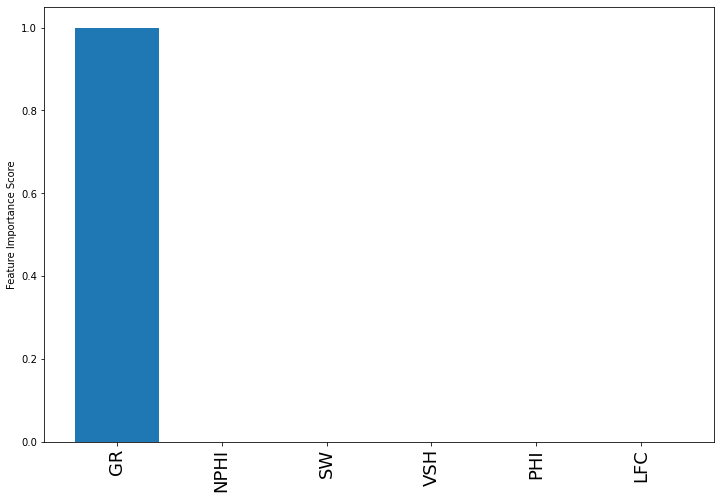

<Figure size 864x576 with 0 Axes>

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [4]:
predictions = lithos.predict('RHOB', 400, 1000)

In [5]:
predictions[30:40]

array([2.17597299, 2.1924324 , 2.21045761, 2.25935212, 2.25894904,
       2.24682623, 2.19393993, 2.14719389, 2.08963387, 2.08895378])

In [6]:
a = df.copy()

In [7]:
a['depth'] = range(0, a.shape[0])
c = a.iloc[a[a.depth == 400].index[0]:a[a.depth == 1000].index[0]]

In [8]:
print(f'R2 score is: {sklm.r2_score(c.RHOB, predictions)}')
print(f'RMSE is: {sklm.mean_squared_error(c.RHOB, predictions) ** 0.5}')

R2 score is: 0.8571967343789271
RMSE is: 0.020488871435868316


In [9]:
a1 = a.iloc[a[a.depth == 400].index[0]:a[a.depth == 1000].index[0]]


In [10]:
from sklearn.metrics import mean_squared_error, accuracy_score

mean_squared_error(a1.RHOB, predictions) ** 0.5

0.020488871435868316

In [11]:
c['predictions'] = predictions

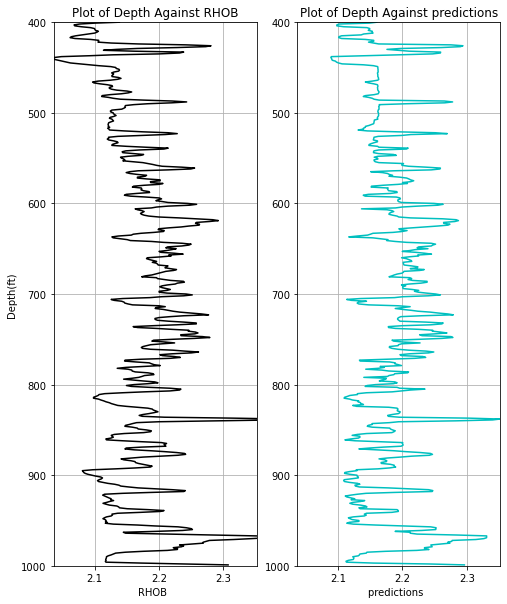

In [13]:
two_plot(c, 'RHOB', 'predictions', top=400, base=1000, scale=True)

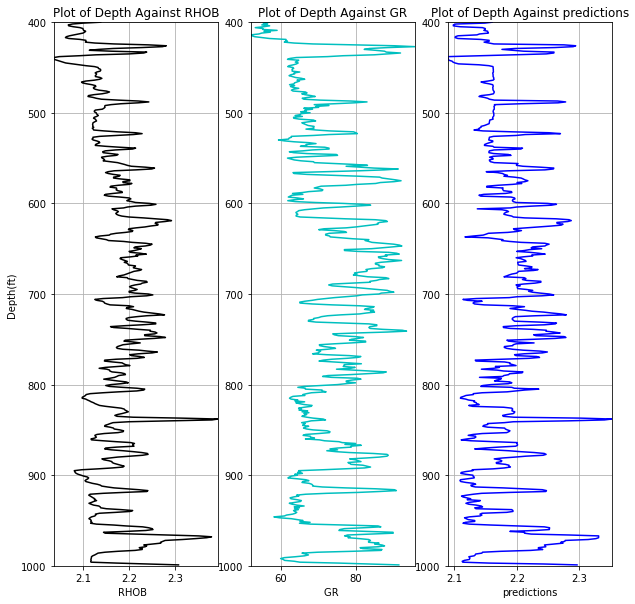

In [12]:
three_plots(c, 'RHOB', 'GR', 'predictions', 400, 1000)

In [1]:
from sklearn.metrics import f1_score, accuracy_score
from plots import two_plots, four_plots
import sklearn.metrics as sklm
import pseudomodes as pds
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def show_evaluation(pred, true):

  '''

  function to show model performance and evaluation
  args:
    pred: predicted value(a list)
    true: actual values (a list)

  prints the custom metric performance, accuracy and F1 score of predictions

  '''

  print(f'Default score: {score(true.values, pred)}')
  print(f'Accuracy is: {accuracy_score(true, pred)}')
  print(f'F1 is: {f1_score(pred, true.values, average="weighted")}')

def score(y_true, y_pred):

    '''
    custom metric used for evaluation
    args:
      y_true: actual prediction
      y_pred: predictions made
    '''

    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

 
lithology_numbers = {30000: 0,
                        65030: 1,
                        65000: 2,
                        80000: 3,
                        74000: 4,
                        70000: 5,
                        70032: 6,
                        88000: 7,
                        86000: 8,
                        99000: 9,
                        90000: 10,
                        93000: 11}
A = np.load('data/penalty_matrix.npy')

In [3]:
df = pd.read_csv('hidden_test.csv.txt', sep=';')

In [11]:
df = pd.read_csv('leaderboard_test_features.csv.txt', sep=';')

In [12]:
facies = pds.DataHandlers(df)
df1 = facies.set_mnemonics(target='FORCE_2020_LITHOFACIES_LITHOLOGY')

In [13]:
facies = pds.PredictLabels(df1, 'DEPTH_MD')

In [14]:
predictions = facies.predict('FORCE_2020_LITHOFACIES_LITHOLOGY', 0, df1.shape[0])

     DEPTH_MD         X_LOC      Y_LOC       Z_LOC     CALI    RSHA      RMED  \
0  480.628001  423244.50000  6461862.5 -455.624420  19.2031 -9999.0  1.613886   
1  480.780001  423244.50000  6461862.5 -455.776428  19.2031 -9999.0  1.574376   
2  480.932001  423244.50000  6461862.5 -455.928436  19.2031 -9999.0  1.436627   
3  481.084001  423244.50000  6461862.5 -456.080444  19.2031 -9999.0  1.276094   
4  481.236001  423244.53125  6461862.5 -456.232422  19.2031 -9999.0  1.204704   

       RDEP      RHOB         GR  ...         DTC         SP      BS  \
0  1.513937  2.171173  72.078377  ...  174.347092  35.525719 -9999.0   
1  1.480188  2.171840  72.147697  ...  176.112915  36.158520 -9999.0   
2  1.469700  2.161303  75.074219  ...  177.662476  36.873703 -9999.0   
3  1.469341  2.151947  80.735229  ...  177.437714  37.304054 -9999.0   
4  1.466462  2.143010  81.665024  ...  176.797653  37.864922 -9999.0   

          ROP    DCAL      DRHO  MUDWEIGHT    RMIC  GROUP_enc  FORMATION_enc  
0

In [7]:
np.unique(predictions, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array([14160,  6377, 79449,  3826,    10,  8402,  1530,  6536,   633,
         1293,   181], dtype=int64))

In [8]:
np.unique(predictions, return_counts=True)

(array([ 0,  1,  2,  3,  5,  9, 10], dtype=int64),
 array([24458,  4964, 82945,   885,  8630,   332,   183], dtype=int64))

In [19]:
labels = pd.read_csv('leaderboard_test_target.csv.txt', sep=';')

In [21]:
labels = labels.FORCE_2020_LITHOFACIES_LITHOLOGY

labels = labels.map(lithology_numbers)

In [9]:
show_evaluation(predictions, labels)   # hidden test data

Default score: -0.4846299337402061
Accuracy is: 0.8004607956077355
F1 is: 0.8175227838613803


In [22]:
show_evaluation(predictions, labels)   # open test data

Default score: -0.5330379205474245
Accuracy is: 0.7928954717588057
F1 is: 0.8154869064536998


In [ ]:
test = pds.DataHandlers(df1)
df2 = test()

In [9]:
df3 = facies.set_mnemonics('NPHI', 'RHOB', 'RMED', 'GR')

In [13]:
df4 = pd.DataFrame()
df4['RHOB'] = df3['RHOB']
df4['GR'] = df3['GR']
df4['RT'] = df3['RT']
df4['NPHI'] = df3['NPHI']

df4.head()

,RHOB,GR,RT,NPHI
0,1.884186,NaN,1.611410,80.200851
1,1.889794,NaN,1.618070,79.262886
2,1.896523,NaN,1.626459,74.821999
3,1.891913,NaN,1.621594,72.878922
4,1.880034,NaN,1.602679,71.729141
